# **Spam Detection**

**OBJECTIVE**: explore text message data and use different ML algorithms to detect if a message is either spam or not. 

## Data Description & Preparation


Dataset **spam.csv**:

* **Number of Observations**: 5572

* **Number of Attributes**: 2 features. Target variable (binary: ham and spam), and messages' text variable (text)


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
spam_data = pd.read_csv('spam.csv')
print(spam_data.shape)
spam_data.head(10)

(5572, 2)


,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [2]:
# Change target variable
spam_data['target'] = np.where(spam_data['target']=='spam',1,0)

# Split dataset in training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spam_data['text'], spam_data['target'], test_size = 0.2, random_state=0)

In [3]:
# Percentage of the documents that are spam?
print(spam_data['target'].value_counts())
print('Spam percentage: ', (spam_data[spam_data['target']==1].count()[0]/len(spam_data['target']))*100)

0    4825
1     747
Name: target, dtype: int64
Spam percentage:  13.406317300789663


## Data Analysis

In [4]:
# We fit the training data using a Count Vectorizer with default parameters, and find the longest word.
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
feat = vect.get_feature_names_out()
print('Longest word: ', max(set(feat), key=len))

Longest word:  com1win150ppmx3age16subscription


In [5]:
# Fit and transform the training data using a Tfidf Vectorizer with default parameters. What 20 features have the smallest tf-idf and what 20 have the largest tf-idf? (sorted)

from sklearn.feature_extraction.text import TfidfVectorizer

vect1=TfidfVectorizer().fit(X_train)
X_train_vectorized=vect1.transform(X_train)
feature_names = np.array(vect1.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0]

all_ = pd.Series(data=sorted_tfidf_index, index=feature_names, dtype=float)
largest20 = all_.sort_index().sort_values(ascending=False, kind='mergesort')[:20]
smallest20 = all_.sort_index().sort_values(ascending=True, kind='mergesort')[:20]
    
print('20 features with smallest tf-idf: \n', smallest20)
print('20 features with largest tf-idf: \n', largest20)

20 features with smallest tf-idf: 
 attraction      0.072395
craziest        0.072395
makiing         0.072395
praises         0.072395
proove          0.072395
sambar          0.072395
sorrows         0.072395
aaniye          0.074700
athletic        0.074700
chef            0.074700
companion       0.074700
courageous      0.074700
dependable      0.074700
determined      0.074700
exterminator    0.074700
healer          0.074700
listener        0.074700
organizer       0.074700
pest            0.074700
psychiatrist    0.074700
dtype: float64
20 features with largest tf-idf: 
 146tf150p         1.000000
645               1.000000
anything          1.000000
anytime           1.000000
beerage           1.000000
congratulation    1.000000
done              1.000000
er                1.000000
havent            1.000000
home              1.000000
lei               1.000000
nite              1.000000
ok                1.000000
okie              1.000000
thank             1.000000
thanx    

/Library/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
# What is the average length of documents (number of characters) for not spam and spam documents?

total_spam = 0
total_nospam = 0
for i in range(len(spam_data)):
    if spam_data['target'][i] == 1:
        total_spam += len(spam_data['text'][i])
    elif spam_data['target'][i] == 0:
        total_nospam += len(spam_data['text'][i])

print('Average number of characters for NOT SPAM documents: ', total_nospam/len(spam_data[spam_data['target']==0]), '\nAverage number of characters for SPAM documents: ', total_spam/len(spam_data[spam_data['target']==1]))

Average number of characters for NOT SPAM documents:  71.02362694300518 
Average number of characters for SPAM documents:  138.8661311914324


In [7]:
# The following function has been provided to help you combine new features into the training data:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [8]:
# What is the average number of digits per document for not spam and spam documents?

import re

total_spam = 0
total_nospam = 0
for i in range(len(spam_data)):
    if spam_data['target'][i] == 1:
        total_spam += len(re.findall('\d',spam_data['text'][i]))
    elif spam_data['target'][i] == 0:
        total_nospam += len(re.findall('\d',spam_data['text'][i]))
    
print('Average number of digits for NOT SPAM documents: ', total_nospam/len(spam_data[spam_data['target']==0]), '\nAverage number of digits for SPAM documents: ', total_spam/len(spam_data[spam_data['target']==1]))

Average number of digits for NOT SPAM documents:  0.2992746113989637 
Average number of digits for SPAM documents:  15.759036144578314


In [9]:
# What is the average number of non-word characters (anything other than a letter, digit or underscore) per document for not spam and spam documents?

total_spam = 0
total_nospam = 0
for i in range(len(spam_data)):
    if spam_data['target'][i] == 1:
        total_spam += len(re.findall('\W',spam_data['text'][i]))
    elif spam_data['target'][i] == 0:
        total_nospam += len(re.findall('\W',spam_data['text'][i]))

print('Average number of non-words for NOT SPAM documents: ', total_nospam/len(spam_data[spam_data['target']==0]), '\nAverage number of non-words for SPAM documents: ', total_spam/len(spam_data[spam_data['target']==1]))

Average number of non-words for NOT SPAM documents:  17.29181347150259 
Average number of non-words for SPAM documents:  29.041499330655956


## Modeling

##### Imports and Estimators 

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from tabulate import tabulate

In [11]:
estimators_and_par = {
    'Multinomial NB': [MultinomialNB(), {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}],
    'LOGISTIC REGRESSION': [LogisticRegression(), {'solver': ['newton-cg', 'lbfgs', 'sag'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'max_iter':[5000]}],
    'SVC': [SVC(), {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf','sigmoid']}]  
}

##### Functions

In [12]:
def table_bestmodel(estimators):
    """Funtion that outputs a table comparing the best performing models after conducting hyperparameter tuning. 
    Parameters:
    - estimators: dictionary of the classification models and parameters grid to use in GridSearchCV() (see cell above for an example of the structure"""
    global y_train, y_test, X_tn, X_ts
    info_dict = {}
    for key, value in estimators.items():
        gs_acc = GridSearchCV(estimator=value[0], param_grid=value[1], cv=5, scoring='accuracy', refit=True, n_jobs=-1)
        gs_acc.fit(X_tn,y_train)
        model_BEST = gs_acc.best_estimator_
        model_BEST.fit(X_tn, y_train)
        y_pred_acc= model_BEST.predict(X_ts)
        info_dict[key] = {'Train acc.': gs_acc.best_score_, 'Test acc.': accuracy_score(y_test, y_pred_acc),'AUC score': roc_auc_score(y_test, y_pred_acc), 'Best Model': gs_acc.best_estimator_, }
    df_acc = pd.DataFrame(info_dict)
    df_acc = df_acc.T
    df_acc.columns = ["Train Acc.", "Test Acc.","AUC score", "Best Model"]
    print(tabulate(df_acc, headers="keys", tablefmt='fancy_grid'))

In [13]:
def model_plots(model):
    """Funtion that, given a model, plots its confusion matrix (also some other metrics). 
    Parameters:
    - model: classification model we want the confusion matrix of"""
    global y_train, y_test, X_tn, X_ts

    model.fit(X_tn,y_train)
    y_pred = model.predict(X_ts)
    
    # Model's Accuracy 
    print('Test Accuracy: ', accuracy_score(y_test, y_pred))
    print('AUC score: ', roc_auc_score(y_test, y_pred))
    
    # Plot the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.subplots(figsize=(18, 7))
    plot = sns.heatmap(cm, annot=True, fmt='g',cmap='rocket', linewidth=1)  
    plot.set_xlabel('Predicted labels')
    plot.set_ylabel('True labels')
    plot.set_title('Confusion Matrix: ')
    plot.xaxis.set_ticklabels(['Not Spam', 'Spam'])
    plot.yaxis.set_ticklabels(['Not Spam', 'Spam'])
    plt.show()

In [14]:
def model_ROC_plots(model1_NB, model2_SVC, model3_LOG):
    """Funtion that, given two models, plots their ROC curve (for comparison) and the Random prediction ROC curve. 
    Parameters:
    - model1_NB, model2_SVC, model3_LOG: classification models we want the ROC curve of"""
    global y_train, y_test, X_tn, X_ts
    # Model 1
    model1_NB.fit(X_tn,y_train)
    y_pred_proba1 = model1_NB.predict_proba(X_ts)[::,1]
    fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba1)
    auc1 = roc_auc_score(y_test, y_pred_proba1)
    # Model 2
    model2_SVC.fit(X_tn,y_train)
    y_pred_proba2 = model2_SVC.predict_proba(X_ts)[::,1]
    fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba2)
    auc2 = roc_auc_score(y_test, y_pred_proba2)
    # Model 3
    model3_LOG.fit(X_tn,y_train)
    y_pred_proba3 = model3_LOG.predict_proba(X_ts)[::,1]
    fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba3)
    auc3 = roc_auc_score(y_test, y_pred_proba3)

    plt.figure(figsize=(10,10))
    plt.plot(fpr1, tpr1, marker='.', label='MultinomialNB (AUROC = %0.3f)' % auc1)
    plt.plot(fpr2, tpr2, marker='.', label='SVC (AUROC = %0.3f)' % auc2)
    plt.plot(fpr3, tpr3, linestyle='--', label='Logistic Regression (AUROC = %0.3f)' % auc3)

    plt.title('ROC Plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 17}) 
    plt.show()

#### With Count Vectorizer

In [15]:
# Fit and transform the training data using a Count Vectorizer with default parameters. 
vect = CountVectorizer(min_df=3).fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

# ADD LENGTH OF DOCUMENT
len_char_train=[len(X_train.iloc[i]) for i in range(len(X_train))]
len_char_test=[len(X_test.iloc[i]) for i in range(len(X_test))]
# ADD N. OF DIGITS PER DOCUMENT
digits_train = [len(re.findall('\d',X_train.iloc[i])) for i in range(len(X_train))]
digits_test = [len(re.findall('\d',X_test.iloc[i])) for i in range(len(X_test))]
# ADD N. NON WORD
non_digits_train = [len(re.findall('\W',X_train.iloc[i])) for i in range(len(X_train))]
non_digits_test = [len(re.findall('\W',X_test.iloc[i])) for i in range(len(X_test))]  

X_tn = add_feature(add_feature(add_feature(X_train_vectorized,len_char_train), digits_train), non_digits_train)
X_ts = add_feature(add_feature(add_feature(X_test_vectorized, len_char_test), digits_test),non_digits_test)

In [16]:
table_bestmodel(estimators=estimators_and_par)

╒═════════════════════╤══════════════╤═════════════╤═════════════╤═════════════════════════════════════════╕
│                     │   Train Acc. │   Test Acc. │   AUC score │ Best Model                              │
╞═════════════════════╪══════════════╪═════════════╪═════════════╪═════════════════════════════════════════╡
│ Multinomial NB      │     0.987212 │    0.989238 │    0.973796 │ MultinomialNB(alpha=0.1)                │
├─────────────────────┼──────────────┼─────────────┼─────────────┼─────────────────────────────────────────┤
│ LOGISTIC REGRESSION │     0.987884 │    0.986547 │    0.967245 │ LogisticRegression(C=10, max_iter=5000) │
├─────────────────────┼──────────────┼─────────────┼─────────────┼─────────────────────────────────────────┤
│ SVC                 │     0.988782 │    0.991928 │    0.977862 │ SVC(C=1000, gamma=0.0001)               │
╘═════════════════════╧══════════════╧═════════════╧═════════════╧═════════════════════════════════════════╛


Test Accuracy:  0.9919282511210762
AUC score:  0.9778619218708342


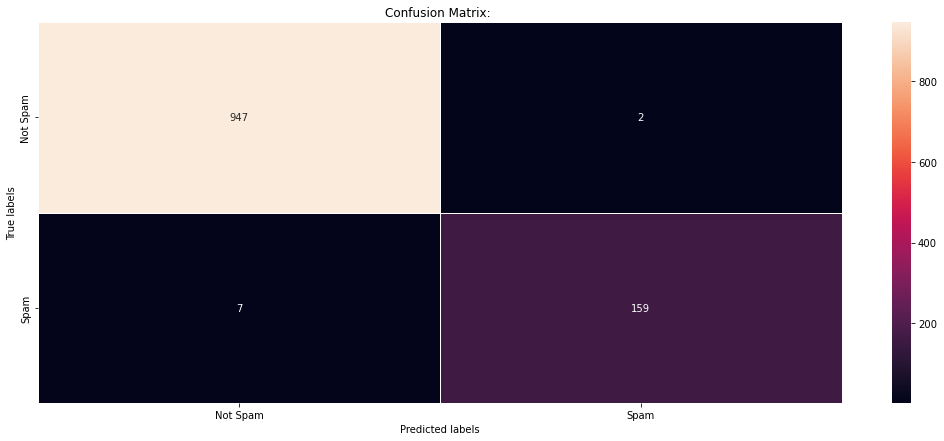

In [17]:
best_acc = SVC(C=1000, gamma=0.0001)  
model_plots(best_acc)

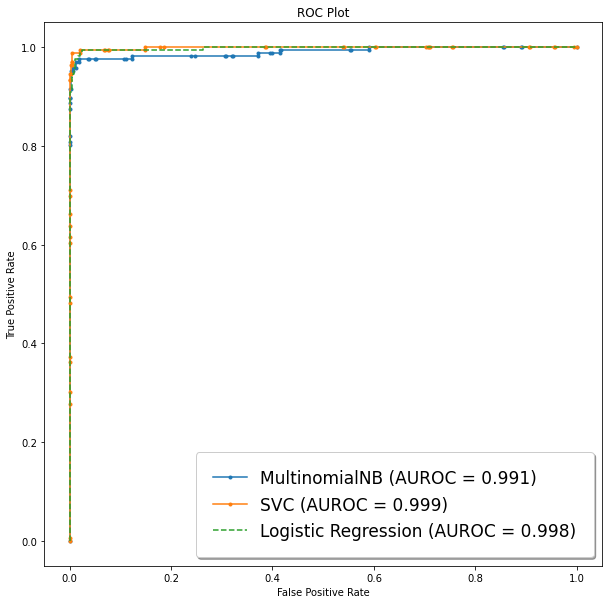

In [18]:
model_ROC_plots(MultinomialNB(alpha=0.1),SVC(C=1000, gamma=0.0001, probability=True),LogisticRegression(C=10, max_iter=5000))

#### With Tfidf Vectorizer 

In [19]:
vect2 = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized = vect2.transform(X_train)
X_test_vectorized = vect2.transform(X_test)

# ADD LENGTH OF DOCUMENT
len_char_train=[len(X_train.iloc[i]) for i in range(len(X_train))]
len_char_test=[len(X_test.iloc[i]) for i in range(len(X_test))]
# ADD N. OF DIGITS PER DOCUMENT
digits_train = [len(re.findall('\d',X_train.iloc[i])) for i in range(len(X_train))]
digits_test = [len(re.findall('\d',X_test.iloc[i])) for i in range(len(X_test))]
# ADD N. NON WORD
non_digits_train = [len(re.findall('\W',X_train.iloc[i])) for i in range(len(X_train))]
non_digits_test = [len(re.findall('\W',X_test.iloc[i])) for i in range(len(X_test))]  

X_tn = add_feature(add_feature(add_feature(X_train_vectorized,len_char_train), digits_train), non_digits_train)
X_ts = add_feature(add_feature(add_feature(X_test_vectorized, len_char_test), digits_test),non_digits_test)

In [20]:
table_bestmodel(estimators=estimators_and_par)

╒═════════════════════╤══════════════╤═════════════╤═════════════╤══════════════════════════════════════════════════════════════╕
│                     │   Train Acc. │   Test Acc. │   AUC score │ Best Model                                                   │
╞═════════════════════╪══════════════╪═════════════╪═════════════╪══════════════════════════════════════════════════════════════╡
│ Multinomial NB      │     0.983621 │    0.98565  │    0.961748 │ MultinomialNB(alpha=1e-05)                                   │
├─────────────────────┼──────────────┼─────────────┼─────────────┼──────────────────────────────────────────────────────────────┤
│ LOGISTIC REGRESSION │     0.988109 │    0.988341 │    0.968299 │ LogisticRegression(C=100, max_iter=5000, solver='newton-cg') │
├─────────────────────┼──────────────┼─────────────┼─────────────┼──────────────────────────────────────────────────────────────┤
│ SVC                 │     0.984519 │    0.990135 │    0.969353 │ SVC(C=1000, gamma=0.001

Test Accuracy:  0.9901345291479821
AUC score:  0.9693526476824051


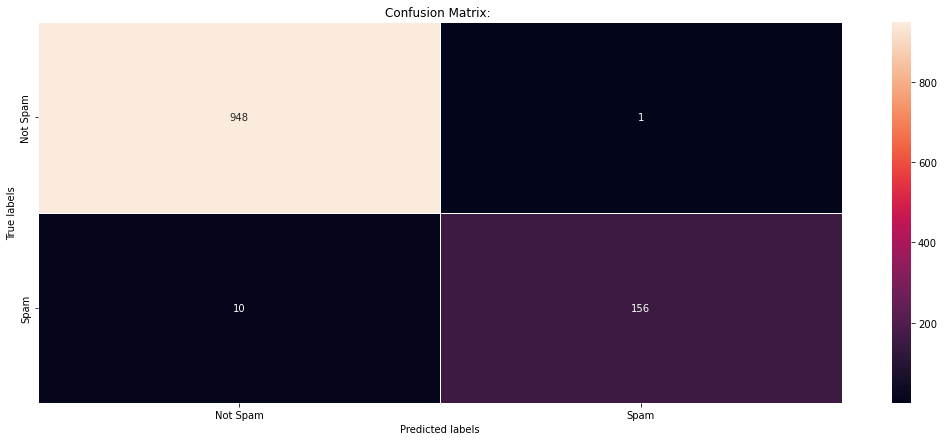

In [21]:
best_acc = SVC(C=1000, gamma=0.001)
model_plots(best_acc)

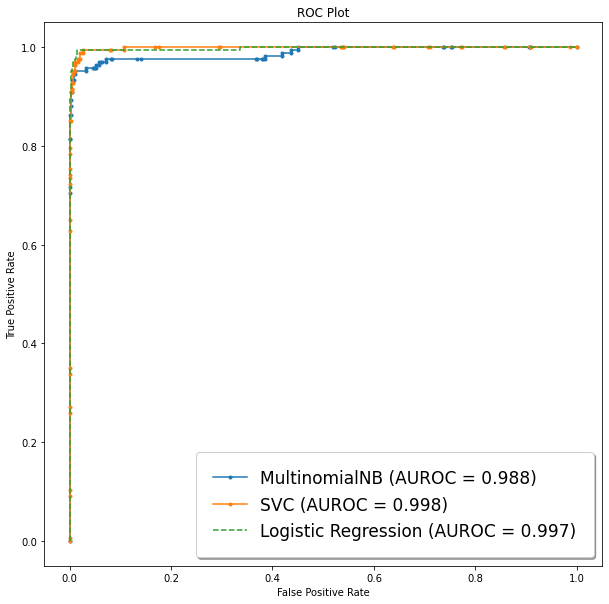

In [22]:
model_ROC_plots(MultinomialNB(alpha=1e-05),SVC(C=1000, gamma=0.0001, probability=True),LogisticRegression(C=100, max_iter=5000, solver='newton-cg'))

#### With Count Vectorizer and N-grams

In [23]:
# To tell Count Vectorizer to use character n-grams we pass in analyzer='char_wb' which creates character n-grams only from text inside word boundaries. This should make the model more robust to spelling mistakes.

vect3 = CountVectorizer(min_df=5, ngram_range=(2,5), analyzer='char_wb').fit(X_train)
X_train_vectorized = vect3.transform(X_train)
X_test_vectorized = vect3.transform(X_test)

# ADD LENGTH OF DOCUMENT
len_char_train=[len(X_train.iloc[i]) for i in range(len(X_train))]
len_char_test=[len(X_test.iloc[i]) for i in range(len(X_test))]
# ADD N. OF DIGITS PER DOCUMENT
digits_train = [len(re.findall('\d',X_train.iloc[i])) for i in range(len(X_train))]
digits_test = [len(re.findall('\d',X_test.iloc[i])) for i in range(len(X_test))]
# ADD N. NON WORD
non_digits_train = [len(re.findall('\W',X_train.iloc[i])) for i in range(len(X_train))]
non_digits_test = [len(re.findall('\W',X_test.iloc[i])) for i in range(len(X_test))]  

X_tn = add_feature(add_feature(add_feature(X_train_vectorized,len_char_train), digits_train), non_digits_train)
X_ts = add_feature(add_feature(add_feature(X_test_vectorized, len_char_test), digits_test),non_digits_test)

In [25]:
table_bestmodel(estimators=estimators_and_par)

╒═════════════════════╤══════════════╤═════════════╤═════════════╤══════════════════════════════════════════════════════════════╕
│                     │   Train Acc. │   Test Acc. │   AUC score │ Best Model                                                   │
╞═════════════════════╪══════════════╪═════════════╪═════════════╪══════════════════════════════════════════════════════════════╡
│ Multinomial NB      │     0.986314 │    0.990135 │    0.979293 │ MultinomialNB(alpha=0.1)                                     │
├─────────────────────┼──────────────┼─────────────┼─────────────┼──────────────────────────────────────────────────────────────┤
│ LOGISTIC REGRESSION │     0.989006 │    0.991031 │    0.977335 │ LogisticRegression(C=100, max_iter=5000, solver='newton-cg') │
├─────────────────────┼──────────────┼─────────────┼─────────────┼──────────────────────────────────────────────────────────────┤
│ SVC                 │     0.989007 │    0.991928 │    0.975377 │ SVC(C=100, gamma=0.0001

Test Accuracy:  0.9910313901345291
AUC score:  0.9773350514809501


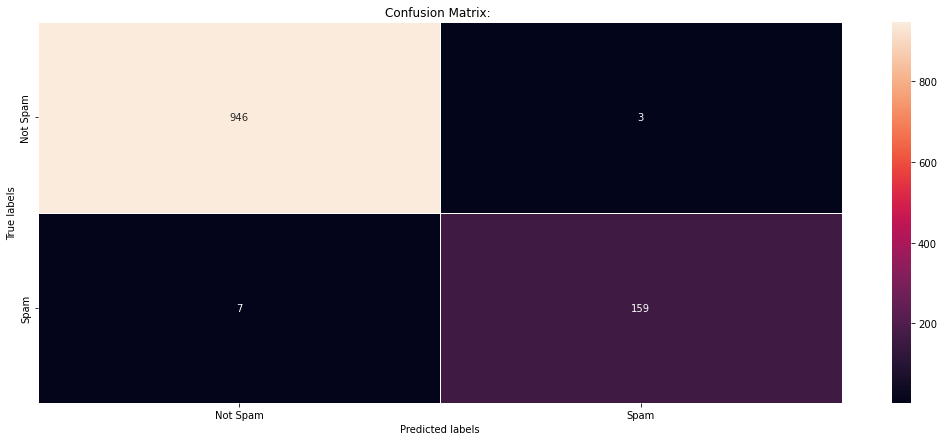

In [26]:
best_acc = LogisticRegression(C=100, max_iter=5000, solver='newton-cg')
model_plots(best_acc)

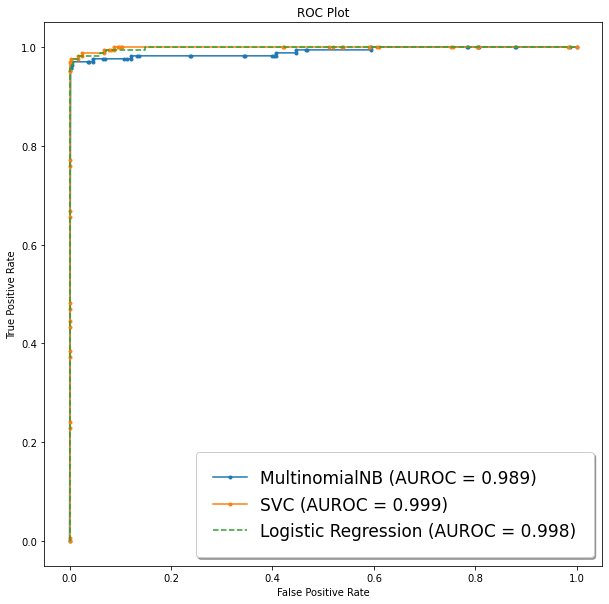

In [28]:
model_ROC_plots(MultinomialNB(alpha=0.1),SVC(C=100, gamma=0.0001, probability=True),LogisticRegression(C=100, max_iter=5000, solver='newton-cg'))

#### With Tfidf Vectorizer and N-grams

In [29]:
# Fit and transform the training data using a Tfidf Vectorizer ignoring terms that have a document frequency strictly lower than 5 and using word n-grams from n=1 to n=3 (unigrams, bigrams, and trigrams).

vect4 = TfidfVectorizer(ngram_range=(1, 3), min_df=5).fit(X_train)
X_train_vectorized = vect4.transform(X_train)
X_test_vectorized = vect4.transform(X_test)

# ADD LENGTH OF DOCUMENT
len_char_train=[len(X_train.iloc[i]) for i in range(len(X_train))]
len_char_test=[len(X_test.iloc[i]) for i in range(len(X_test))]
# ADD N. OF DIGITS PER DOCUMENT
digits_train = [len(re.findall('\d',X_train.iloc[i])) for i in range(len(X_train))]
digits_test = [len(re.findall('\d',X_test.iloc[i])) for i in range(len(X_test))]
# ADD N. NON WORD
non_digits_train = [len(re.findall('\W',X_train.iloc[i])) for i in range(len(X_train))]
non_digits_test = [len(re.findall('\W',X_test.iloc[i])) for i in range(len(X_test))]  

X_tn = add_feature(add_feature(add_feature(X_train_vectorized,len_char_train), digits_train), non_digits_train)
X_ts = add_feature(add_feature(add_feature(X_test_vectorized, len_char_test), digits_test),non_digits_test)

In [30]:
table_bestmodel(estimators=estimators_and_par)

╒═════════════════════╤══════════════╤═════════════╤═════════════╤══════════════════════════════════════════════════════════════╕
│                     │   Train Acc. │   Test Acc. │   AUC score │ Best Model                                                   │
╞═════════════════════╪══════════════╪═════════════╪═════════════╪══════════════════════════════════════════════════════════════╡
│ Multinomial NB      │     0.984294 │    0.98565  │    0.961748 │ MultinomialNB(alpha=1e-05)                                   │
├─────────────────────┼──────────────┼─────────────┼─────────────┼──────────────────────────────────────────────────────────────┤
│ LOGISTIC REGRESSION │     0.987885 │    0.988341 │    0.968299 │ LogisticRegression(C=100, max_iter=5000, solver='newton-cg') │
├─────────────────────┼──────────────┼─────────────┼─────────────┼──────────────────────────────────────────────────────────────┤
│ SVC                 │     0.983622 │    0.990135 │    0.971838 │ SVC(C=1000, gamma=0.001

Test Accuracy:  0.9883408071748879
AUC score:  0.968298906902637


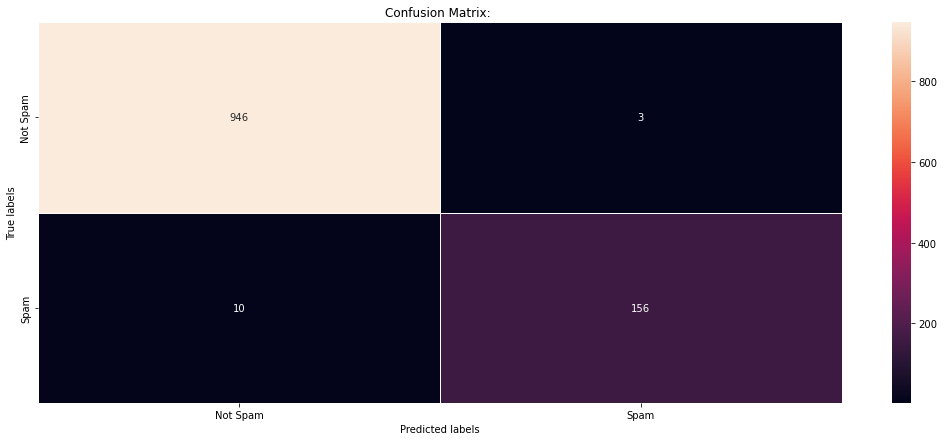

In [35]:
best_acc = SVC(C=1000, gamma=0.001)
model_plots(best_acc)

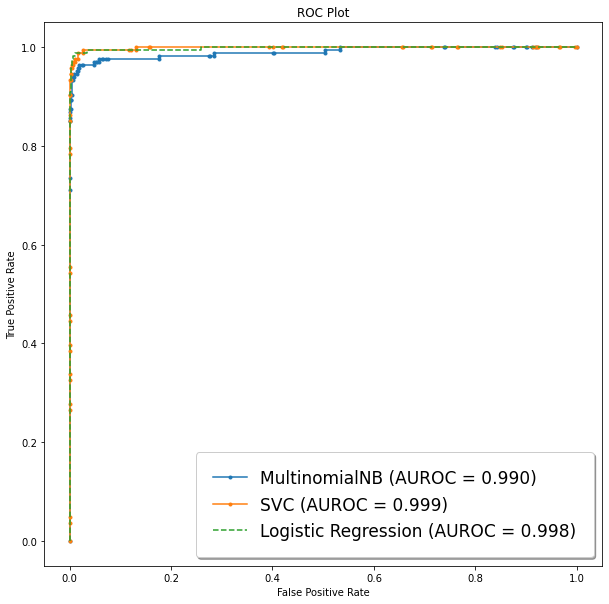

In [32]:
model_ROC_plots(MultinomialNB(alpha=1e-05),SVC(C=1000, gamma=0.001, probability=True),LogisticRegression(C=100, max_iter=5000, solver='newton-cg'))